## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

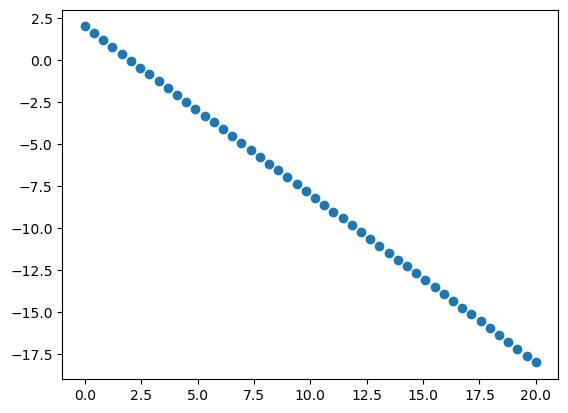

In [5]:
plt.scatter(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [6]:
def gradient_descent_fun(X, y, n_iter=1000, lr=0.01,convergance_rate=0.001,norm_value_check=0.001):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []

    for i in range(n_iter):
        # We need to append theta First due to initialization
        theta_0_all.append(theta_0)
        theta_1_all.append(theta_1)

        # Step two: Predict using initial theta
        h = theta_0 + theta_1 * X

        # Step three: Calculate J & Error Vector
        error_vector = h - y
        J = np.sum(error_vector**2) / (2 * m)
        losses.append(J)

        # Step four: Calculate gradient for weights
        theta_0_grad=sum((h-y))/m
        theta_1_grad=sum((h-y)*X)/m

        # Gradient vector norm
        grad_vector = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))

        # Convergence check
        if (grad_vector < norm_value_check) or ((i != 0) and (abs(losses[i - 1] - J) < convergance_rate)):
            break

        # Step Five: Update our weights
        theta_0 = theta_0 - lr * theta_0_grad
        theta_1 = theta_1 - lr * theta_1_grad
        
        # Print like verbose we have in sklearn
        print(f"****************** Iteration {i} ********************")
        print(f"\nh(x): {h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"J = {J}\n")
        print(f"Gradient Vector:\n[[{theta_0_grad}]\n [{theta_1_grad}]]\n")
        print(f"Gradient Vector Norm: {grad_vector}\n")
        print(f"theta_0_new: {theta_0}\ntheta_1_new: {theta_1}\n")
    
    # Final h with error_vector
    error_vector = (theta_0 + theta_1 * X) - y

    # Final Cost
    final_cost = np.sum(error_vector**2) / (2 * m)

    # predictions
    final_predictions = theta_0 + theta_1 * X
        
    return theta_0,theta_1,losses, theta_0_all, theta_1_all,final_predictions

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
theta_0,theta_1,losses, theta_0_all, theta_1_all,final_predictions=gradient_descent_fun(X, y, n_iter=300, lr=0.0005)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

J = 49.34693877551021

Gradient Vector:
[[8.0]
 [114.69387755102042]]

Gradient Vector Norm: 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0.0573469387755

In [8]:
from sklearn.metrics import r2_score
r2_score(y,final_predictions)

0.9686158031920962

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

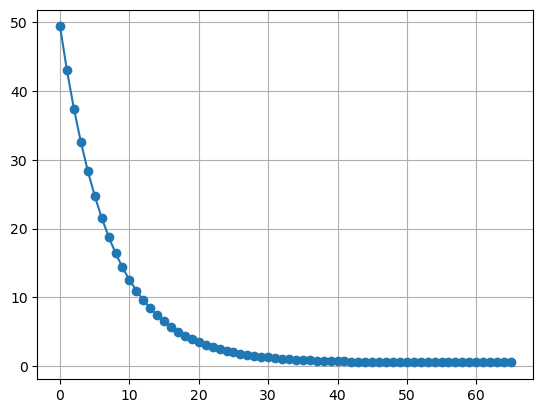

In [9]:
plt.plot(losses,'-o')
plt.grid()

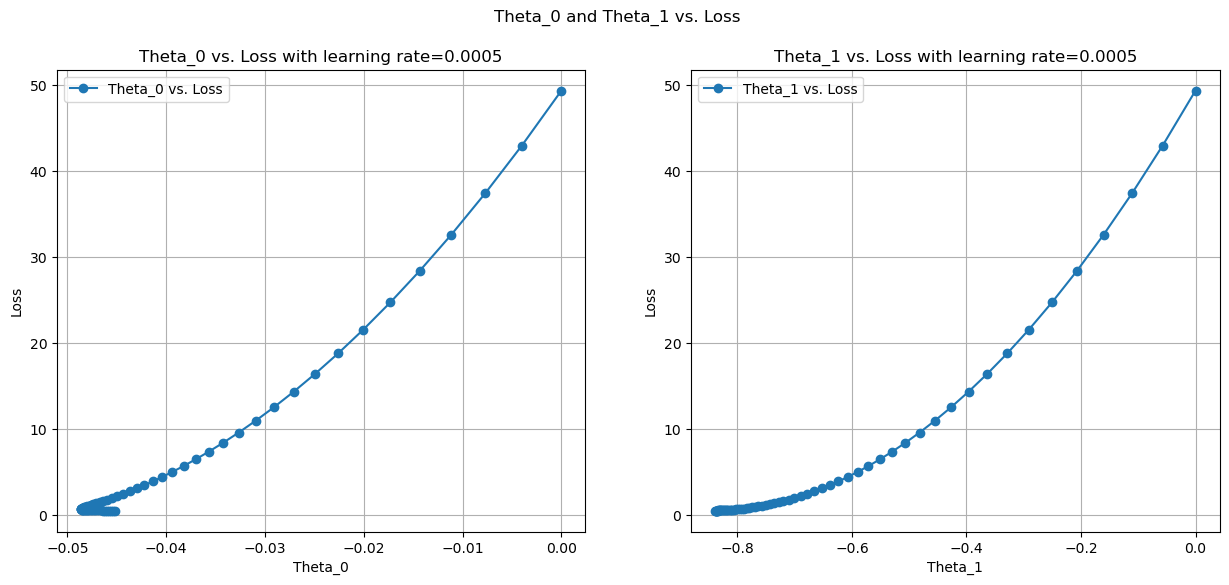

In [10]:
plt.figure(figsize=(15, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(theta_0_all, losses, '-o', label='Theta_0 vs. Loss')
plt.title('Theta_0 vs. Loss with learning rate=0.0005')
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot 2
plt.subplot(1, 2, 2)
plt.plot(theta_1_all, losses, '-o', label='Theta_1 vs. Loss')
plt.title('Theta_1 vs. Loss with learning rate=0.0005')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 
plt.show()


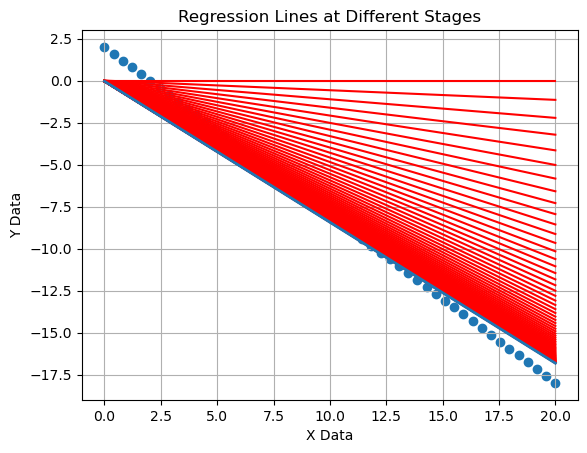

In [11]:
plt.scatter(X, y)

# all regression lines
for i in range(len(theta_0_all)):
    y_pred = theta_0_all[i] + theta_1_all[i] * X
    plt.plot(X, y_pred,color='red')

# final regression line
plt.plot(X, y_pred, linewidth=2)

plt.title('Regression Lines at Different Stages')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.grid(True)


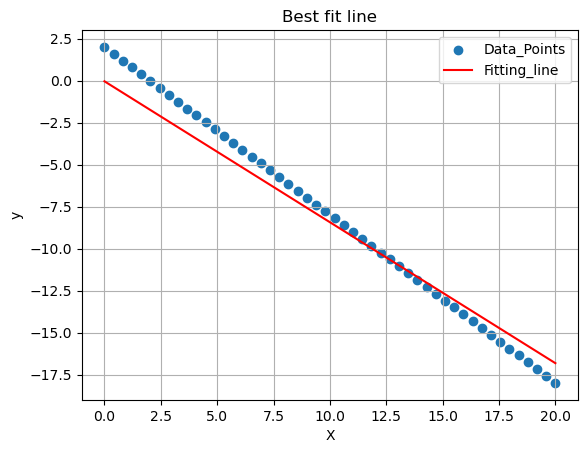

In [12]:
y_pred=final_predictions
# Data points
plt.scatter(X, y, label='Data_Points')

# fitting line
plt.plot(X, y_pred, color='red', label='Fitting_line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best fit line')
plt.legend()
plt.grid()

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [14]:
import numpy as np

def momentum_gradient_descent(X, y, n_iter=1000, lr=0.01, gamma=0.9, convergance_rate=0.001, norm_value_check=0.001):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    
    momentum_theta_0 = 0
    momentum_theta_1 = 0

    for i in range(n_iter):
        # Append theta first due to initialization
        theta_0_all.append(theta_0)
        theta_1_all.append(theta_1)

        # Predict using initial theta
        h = theta_0 + theta_1 * X

        # Calculate J & Error Vector
        error_vector = h - y
        J = np.sum(error_vector**2) / (2 * m)
        losses.append(J)

        # Calculate gradient for weights
        theta_0_grad = sum((h - y)) / m
        theta_1_grad = sum((h - y) * X) / m

        # Gradient vector norm
        grad_vector = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))

        # Convergence check
        if (grad_vector < norm_value_check) or ((i != 0) and (abs(losses[i - 1] - J) < convergance_rate)):
            break

        # Update momentum 
        momentum_theta_0 = gamma * momentum_theta_0 + lr * theta_0_grad
        momentum_theta_1 = gamma * momentum_theta_1 + lr * theta_1_grad

        # Update weights with momentum
        theta_0 = theta_0 - momentum_theta_0
        theta_1 = theta_1 - momentum_theta_1

        # Print like verbose we have in sklearn
        print(f"****************** Iteration {i} ********************")
        print(f"\nh(x): {h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"J = {J}\n")
        print(f"Gradient Vector:\n[[{theta_0_grad}]\n [{theta_1_grad}]]\n")
        print(f"Gradient Vector Norm: {grad_vector}\n")
        print(f"theta_0_new: {theta_0}\ntheta_1_new: {theta_1}\n")

    # Final h with error_vector
    error_vector = (theta_0 + theta_1 * X) - y

    # Final Cost
    final_cost = np.sum(error_vector**2) / (2 * m)

    # predictions
    final_predictions = theta_0 + theta_1 * X

    return theta_0, theta_1, losses, theta_0_all, theta_1_all, final_predictions


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [16]:
theta_0, theta_1, losses, theta_0_all, theta_1_all, final_predictions=momentum_gradient_descent(X, y, n_iter=300, lr=0.0005, gamma=0.5, convergance_rate=0.001, norm_value_check=0.001)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

J = 49.34693877551021

Gradient Vector:
[[8.0]
 [114.69387755102042]]

Gradient Vector Norm: 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0.0573469387755

In [17]:
r2_score(y,final_predictions)

0.9687892837396442

In [30]:
#plot losses with total epochs
def plt_loss_epoch(loss):
    plt.rcParams['figure.figsize'] = [9.8, 6.6]
    plt.plot(loss,"-m",marker=".",markersize=15)
    plt.ylabel("loss")
    plt.xlabel("Epochs")
    plt.grid()

#plot the loss with all theta_0 values
def plt_loss_theta_0(loss,theta_0,mode="gd",gamma="0.5"):
    plt.plot(theta_0,loss,"-m",marker=".",markersize=15)
    plt.ylabel("loss",fontweight='bold',fontsize=14.0)
    plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
    if mode=="gd":
        plt.title("Learning Rate = 0.0005",fontweight='bold',fontsize=14.0)
        plt.grid()
    elif mode=="mgd":
        plt.title(f"Learning Rate = 0.0005 & ɣ={gamma}",fontweight='bold',fontsize=14.0)
        plt.grid()


#plot the loss with all theta_1 values

def plt_loss_theta_1(loss,theta_1,mode="gd",gamma=0.5):
    plt.plot(theta_1,loss,"-m",marker=".",markersize=15)
    plt.ylabel("loss",fontweight='bold',fontsize=14.0)
    plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
    if mode=="gd":
        plt.title("Learning Rate = 0.0005",fontweight='bold',fontsize=14.0)
        plt.grid()
    elif mode=="mgd":
        plt.title(f"Learning Rate = 0.0005 & ɣ={gamma}",fontweight='bold',fontsize=14.0)
        plt.grid()
        
def until_converage(theta_0_all,theta_1_all,X,y):
    plt.scatter(X, y)
    # Plot all regression lines till converge 
    for i in range(len(theta_0_all)):
        y_pred = theta_0_all[i] + theta_1_all[i] * X
        plt.plot(X, y_pred, color='red')
       # final regression line
        plt.title('Regression Lines at Different Stages')
        plt.grid(True)
        
def final_model(X,y,final_predictions):
    #x and y and y predicted
    fig.add_subplot(5,1,5)
    plt.plot(X,y," ",marker=".", markersize=13)
    plt.plot(X,final_predictions,color='r')
    plt.ylabel("y")
    plt.xlabel("x")
    plt.grid()
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


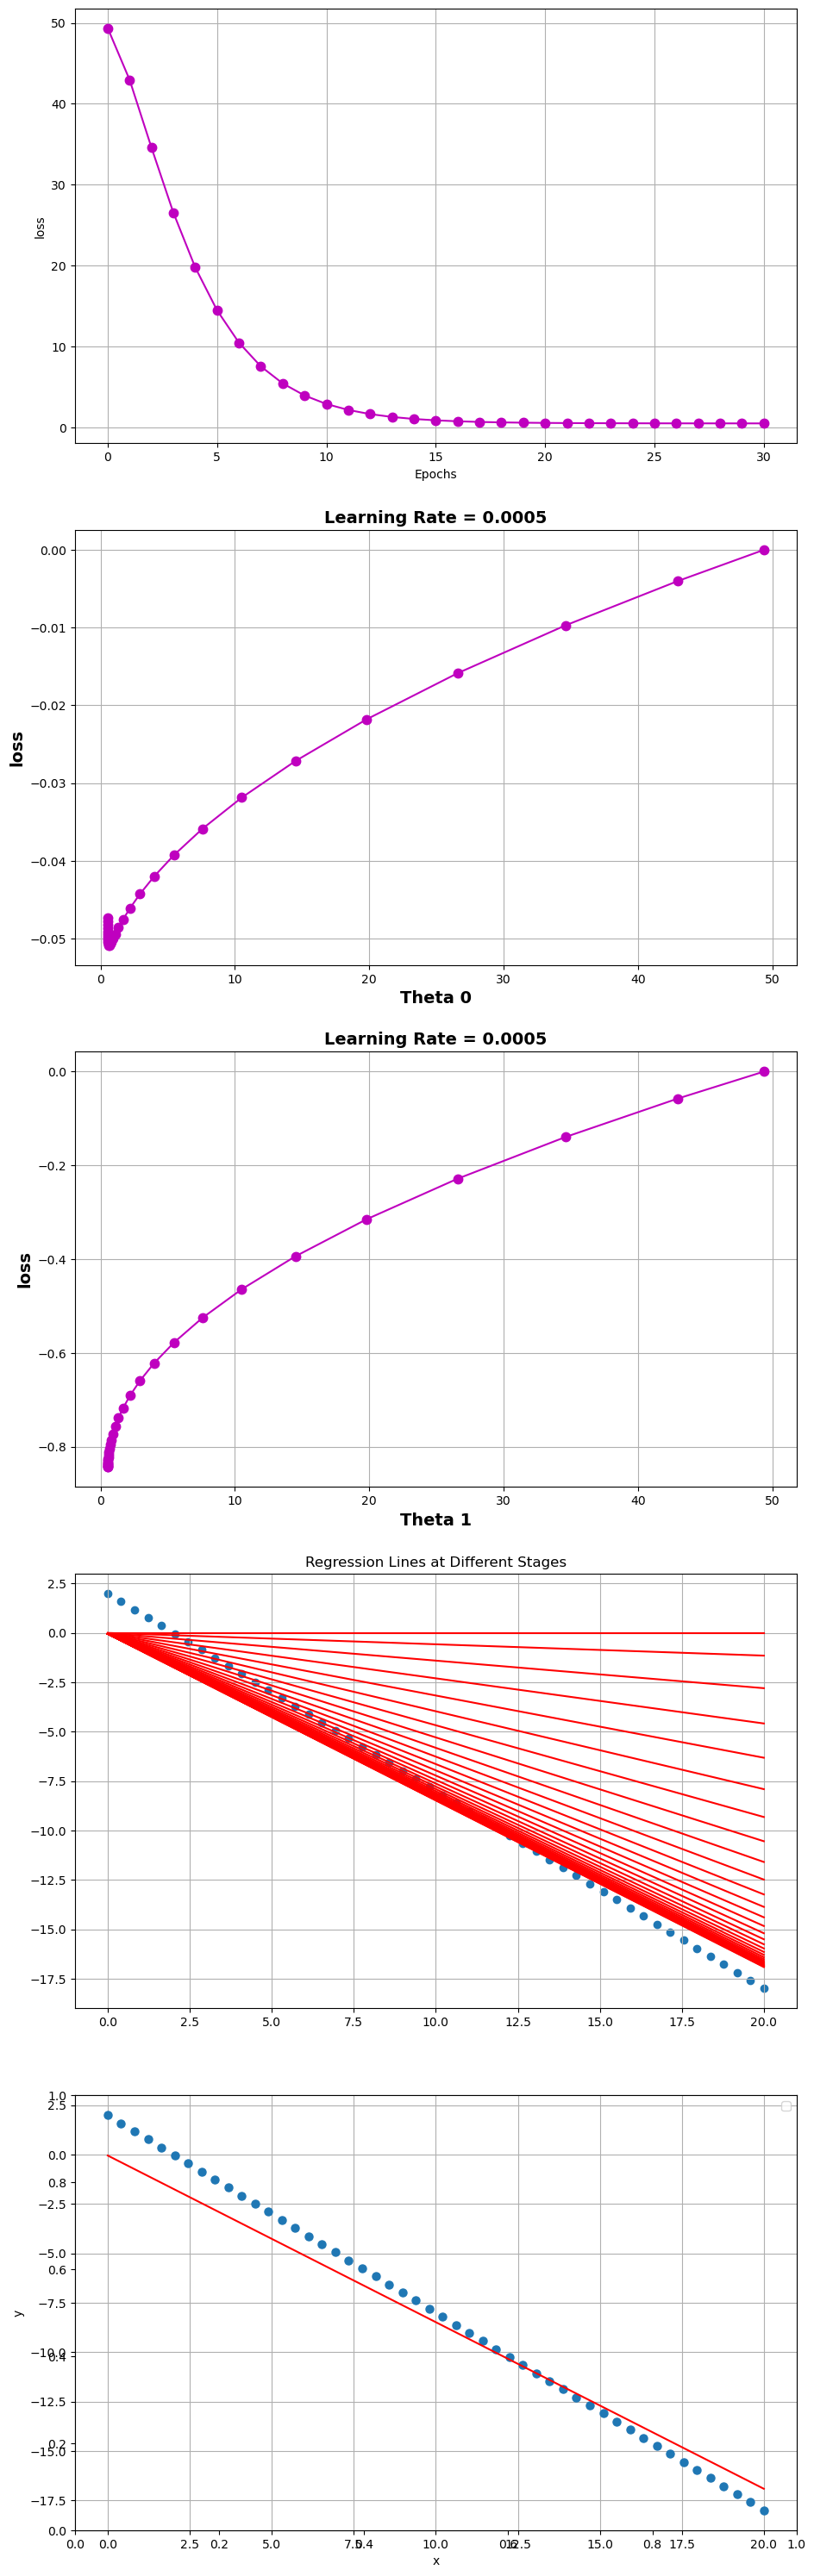

In [31]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [32]:
theta_0, theta_1, losses, theta_0_all, theta_1_all, final_predictions=momentum_gradient_descent(X, y, n_iter=300, lr=0.0005, gamma=0.9, convergance_rate=0.001, norm_value_check=0.001)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

J = 49.34693877551021

Gradient Vector:
[[8.0]
 [114.69387755102042]]

Gradient Vector Norm: 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0.0573469387755

In [33]:
r2_score(y,final_predictions)

0.973589591111118

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


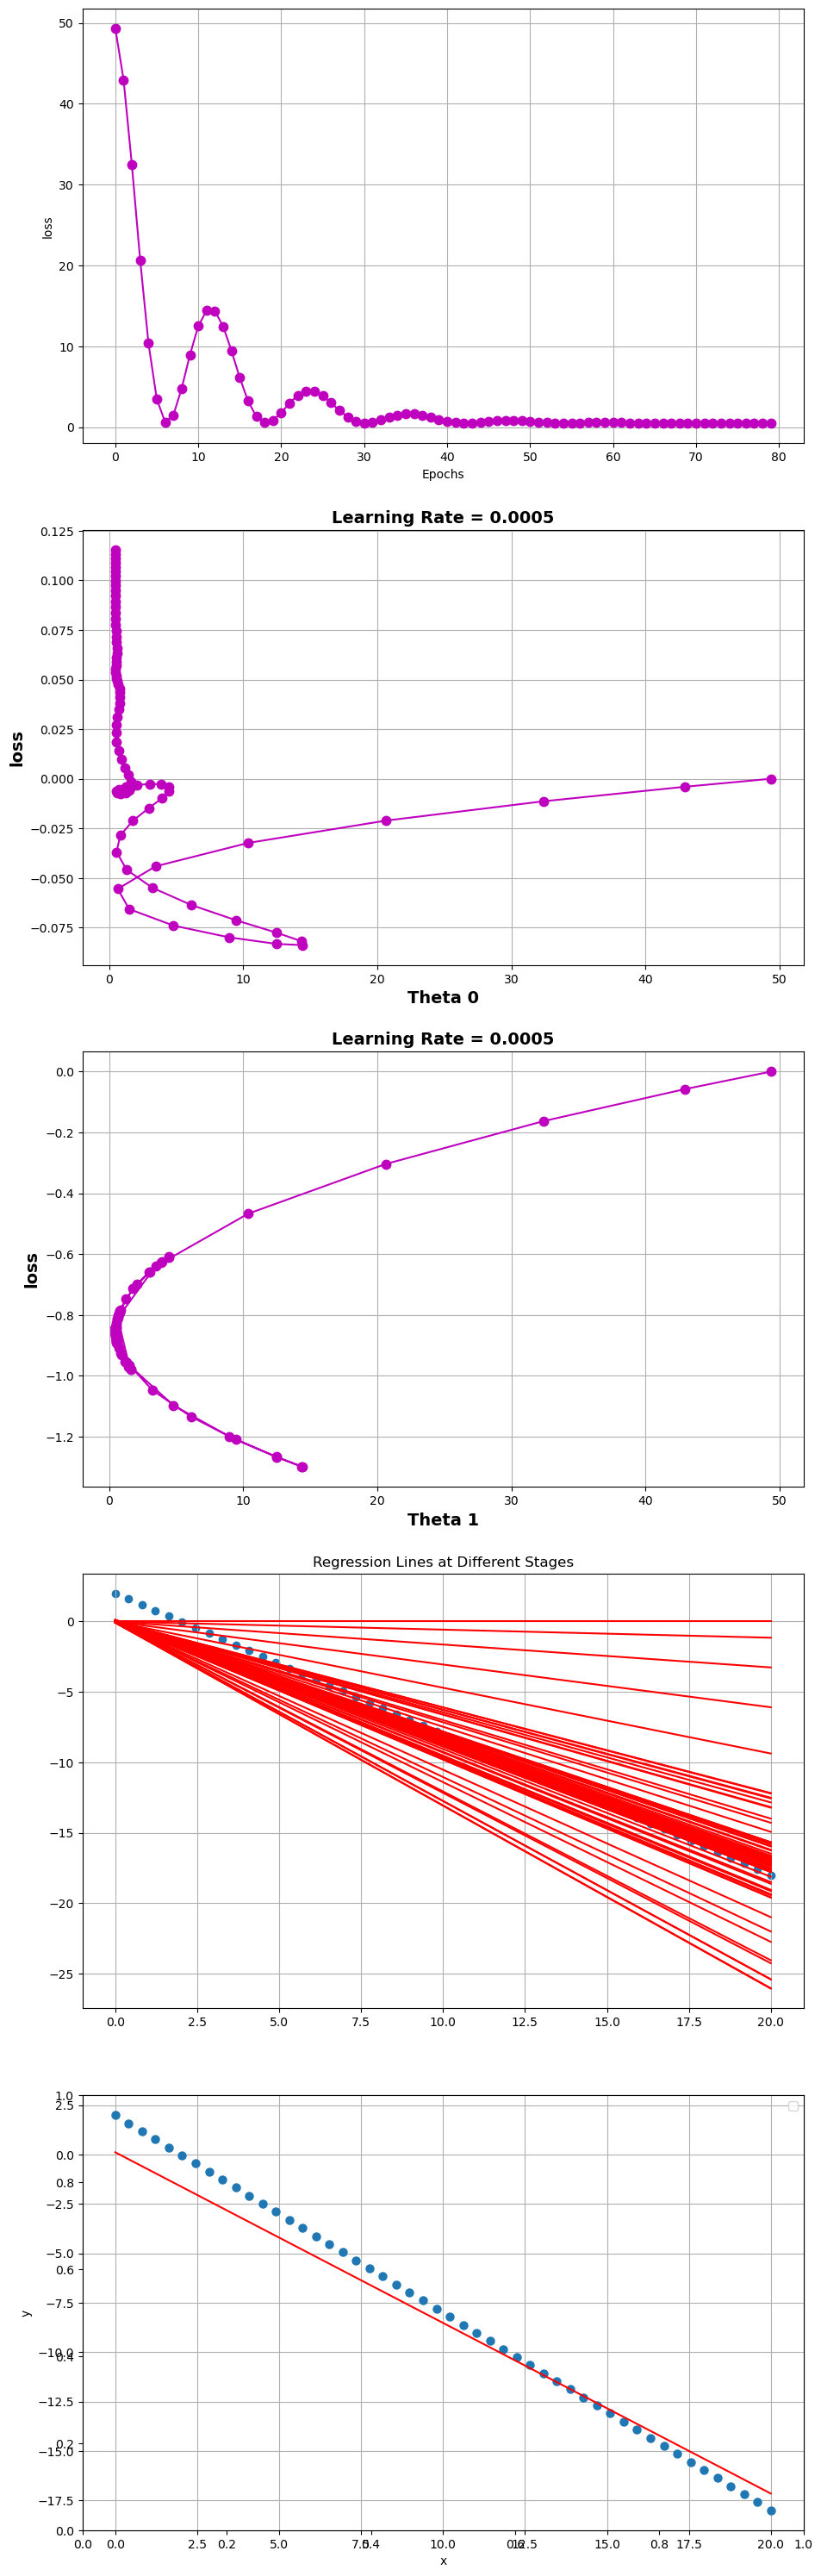

In [34]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [35]:
theta_0, theta_1, losses, theta_0_all, theta_1_all, final_predictions=momentum_gradient_descent(X, y, n_iter=300, lr=0.0005, gamma=0.89, convergance_rate=0.001, norm_value_check=0.001)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

J = 49.34693877551021

Gradient Vector:
[[8.0]
 [114.69387755102042]]

Gradient Vector Norm: 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0.0573469387755

In [36]:
r2_score(y,final_predictions)

0.972435565060376

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


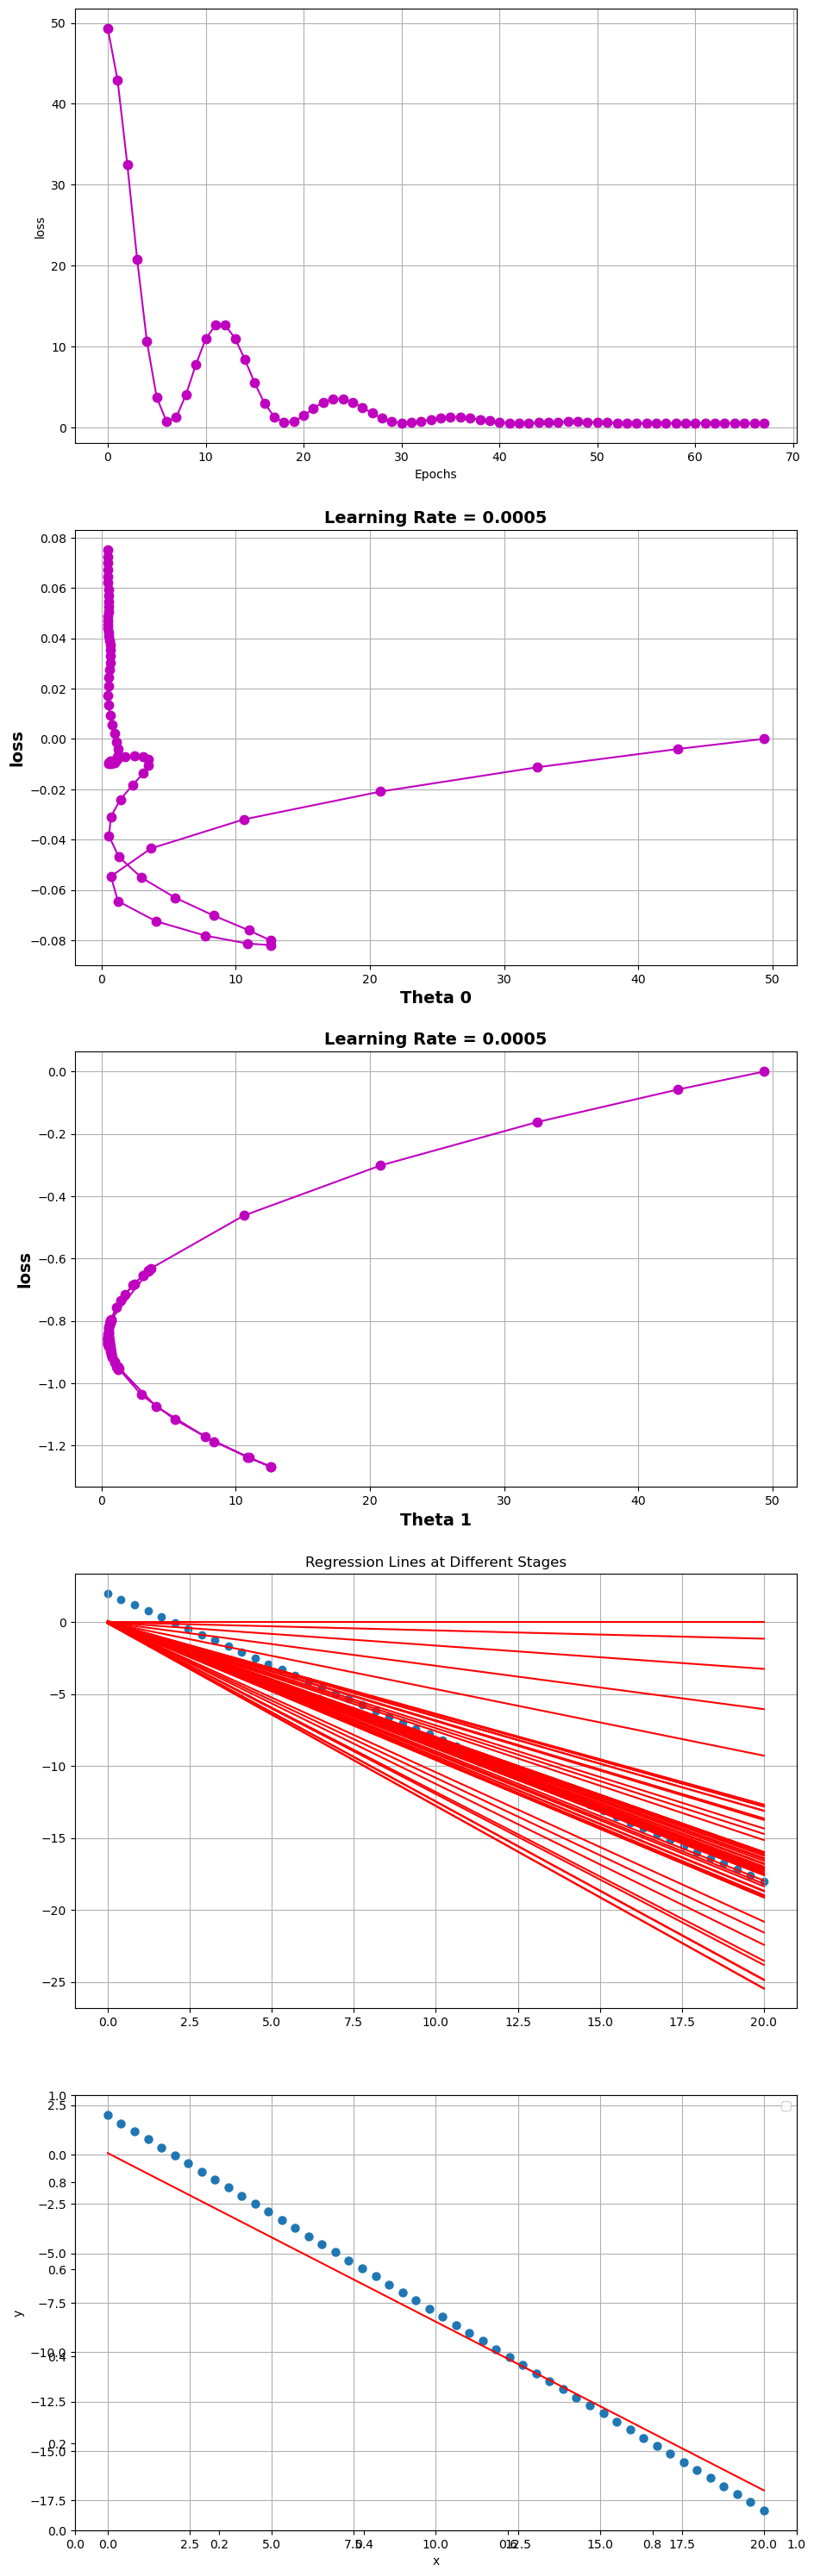

In [37]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [69]:
import numpy as np

def nag_gradient_descent(X, y, n_iter=300, lr=0.01, gamma=0.9, convergance_rate=0.001, norm_value_check=0.001):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    v_0 = 0
    v_1 = 0
    
    for i in range(n_iter):
        # Append theta first due to initialization
        theta_0_all.append(theta_0)
        theta_1_all.append(theta_1)
        
        # Predict==> updated theta_temp
        h = theta_0 + theta_1 * X 
        
        # Calculate J & Error Vector
        error_vector = h - y
        J = np.sum(error_vector**2) / (2 * m)
        losses.append(J)
        
        # Theta 0 gradient & Theta 1 gradient
        d_theta_0 = (1 / m) * np.sum(error_vector)      
        d_theta_1 = (1 / m) * np.sum(error_vector * X)  
        
        grad_vec = np.array([d_theta_0, d_theta_1])
        grad_norm = np.linalg.norm(grad_vec)
        
        # Convergence check
        if (grad_norm < norm_value_check) or ((i > 1) and (abs(losses[-2] - J) < convergance_rate)):
            break
        
        theta_tmp_0  = theta_0 - gamma * v_0
        theta_tmp_1  = theta_1 - gamma * v_1

        h_temp = theta_tmp_0 + theta_tmp_1 * X

        d_theta_tmp_0 = np.sum(h_temp - y) / m
        d_theta_tmp_1 = (np.sum((h_temp - y) * X))/ m

        v_0 = gamma * v_0 + lr * d_theta_tmp_0
        v_1 = gamma * v_1 + lr * d_theta_tmp_1

        theta_0 = theta_tmp_0 - lr * d_theta_tmp_0        
        theta_1 = theta_tmp_1 - lr * d_theta_tmp_1 

        # Print like verbose we have in sklearn
        print(f"****************** Iteration {i} ********************")
        print(f"\nh(x): {h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"J = {J}\n")
        print(f"Gradient Vector:\n[[{d_theta_0}]\n [{d_theta_1}]]\n")
        print(f"Gradient Vector Norm: {grad_vec}\n")
        print(f"theta_0_new: {theta_0}\ntheta_1_new: {theta_1}\n")
    
    # Final h with error_vector
    error_vector = (theta_0 + theta_1 * X) - y
    # Final Cost
    final_cost = np.sum(error_vector**2) / (2 * m)
    # predictions
    final_predictions = theta_0 + theta_1 * X
    print(f"Results for gamma = {gamma}:")
    print(f"Final theta_0: {theta_0}")
    print(f"Final theta_1: {theta_1}")
    print(f"Final Cost: {final_cost}")
    print(f"Final Predictions: {final_predictions}\n")

    return theta_0, theta_1, losses, theta_0_all, theta_1_all, final_predictions


In [70]:
theta_0, theta_1, losses, theta_0_all, theta_1_all, final_predictions=nag_gradient_descent(X, y, n_iter=300, lr=0.0005, gamma=0.9)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

J = 49.34693877551021

Gradient Vector:
[[8.0]
 [114.69387755102042]]

Gradient Vector Norm: [  8.         114.69387755]

theta_0_new: -0.004
theta_1_new: -0.0573

In [71]:
r2_score(y,final_predictions)

0.971103130756324

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


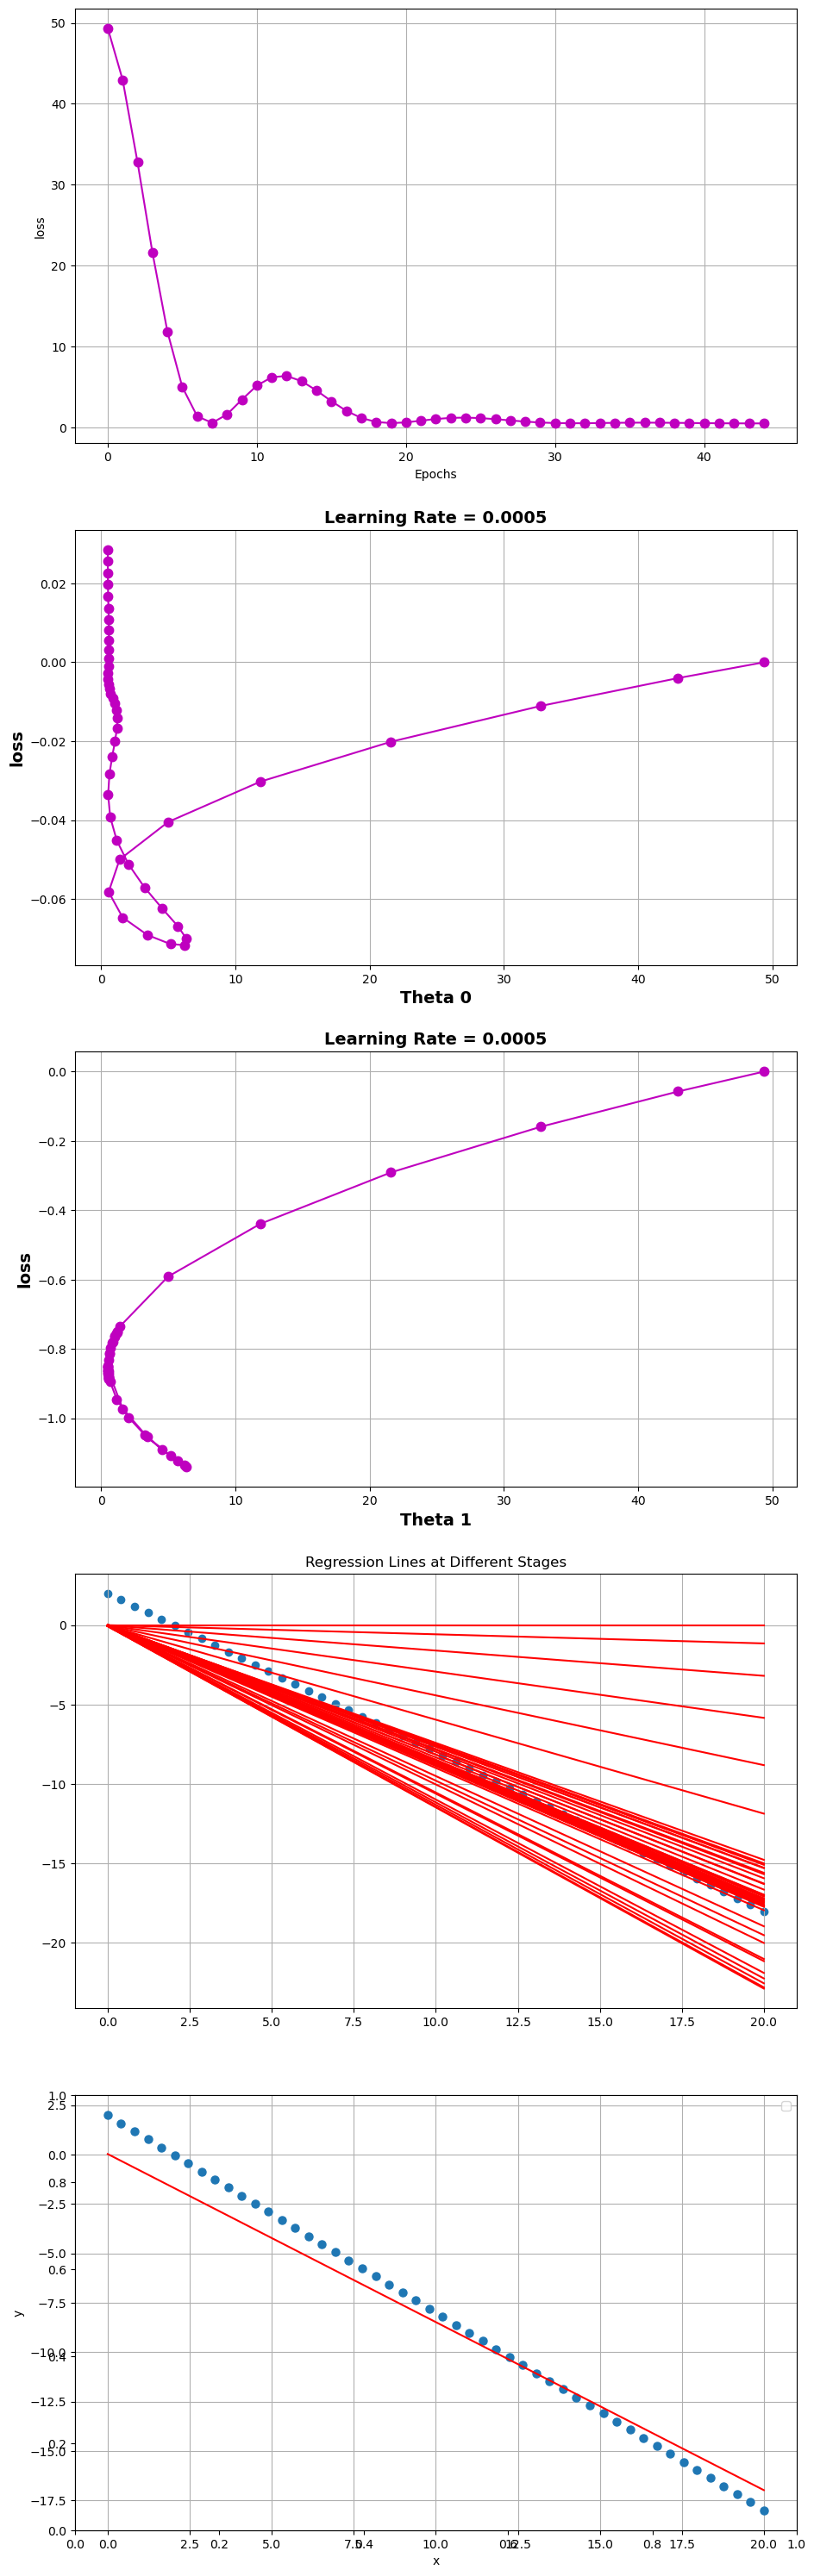

In [72]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [73]:
theta_0, theta_1, losses, theta_0_all, theta_1_all, final_predictions=nag_gradient_descent(X, y, n_iter=300, lr=0.0005, gamma=0.89)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

J = 49.34693877551021

Gradient Vector:
[[8.0]
 [114.69387755102042]]

Gradient Vector Norm: [  8.         114.69387755]

theta_0_new: -0.004
theta_1_new: -0.0573

In [74]:
r2_score(y,final_predictions)

0.9699718983158406

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


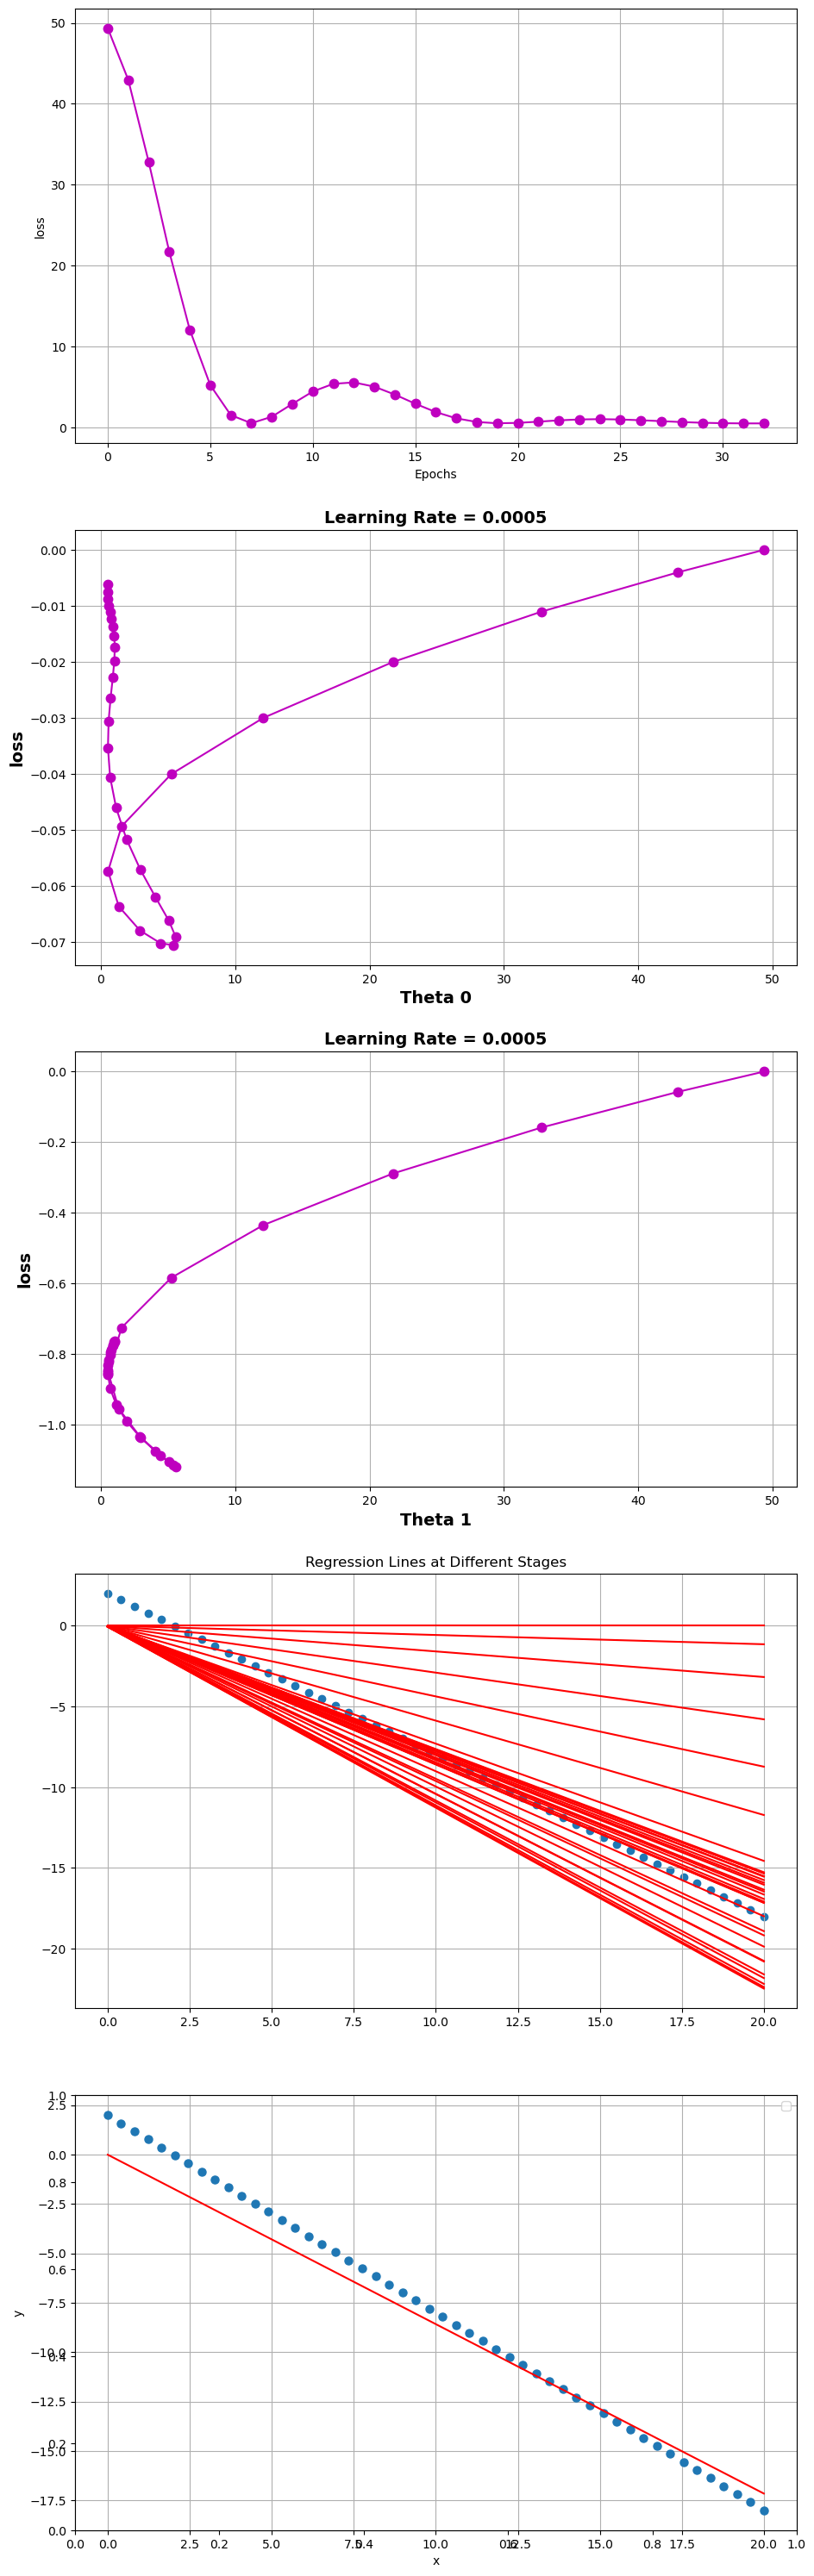

In [75]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)